# Plotting projected data on maps with `cartopy`

Cartopy is a Python package designed for geospatial data for working with data on different geospatial projections and producing plots of this data on maps in a specific project. Further information on cartopy can be found at: https://scitools.org.uk/cartopy/docs/latest/

<b>Key point</b>: It is important to let cartopy know the projection of the input data and the expected projection of plotted map. This is done through the `projection` and `transform` arguments. The `projection` argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

We will make quick spatial plots of the data we examined in the xarray exercises :) 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import cartopy
import cartopy.crs as ccrs

%matplotlib inline

In [2]:
data_path = Path("../data/")

In [3]:
ds = xr.open_dataset(data_path / 'ERA5_temp_rh_West_Africa.nc')
ds_seas = ds.groupby('time.season').mean('time', keep_attrs=True)
ds_seas

<xarray.Dataset>
Dimensions:    (latitude: 77, level: 6, longitude: 153, season: 4)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 3.75 3.5 3.25 3.0
  * level      (level) float64 500.0 600.0 700.0 850.0 925.0 1e+03
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    r          (season, level, latitude, longitude) float32 24.581575 ... 70.71884
    t          (season, level, latitude, longitude) float32 261.53137 ... 301.98785
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Sat May 22 17:00:08 2021: cdo selday,1 ERA5_temperature_rh_...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [4]:
# we'll just select a single level and season to plot for now
ds_single = ds_seas.sel(level=850, season='DJF')

Text(0.5, 1.0, 'DJF Temperature at 850mb')

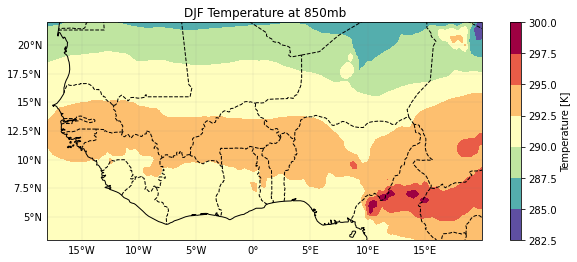

In [5]:
##################### Section 3: Set cartopy projection and plot map ######################
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10, 4))

cf = ds_single.t.plot.contourf(ax=ax, cmap='Spectral_r', transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')

###################### Section 2: Adding the labels of grids ###############################
gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='gray')
gl.top_labels = False  ###Changing these to true or false will add or remove the lon/lat labelling 
gl.right_labels = False
gl.bottom_labels = True
gl.left_labels = True

########################## Section 3: Setting titles and colorbar ##############################
ax.set_title('DJF Temperature at 850mb')## To set title


What if we want to plot a subset of the seasonal temperature. For instance, only plot for the country of Ghana. 

In [6]:
ds_single_ghana = ds_single.sel(longitude=slice(-4,2), latitude=slice(12,4),)

Text(0.5, 1.0, 'DJF Temperature at 850mb')

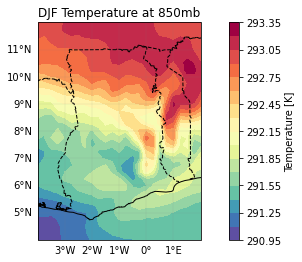

In [7]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10, 4))

cf = ds_single_ghana.t.plot.contourf(ax=ax, cmap='Spectral_r', transform=ccrs.PlateCarree(), levels=20)

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')

gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='gray')
gl.top_labels = False
gl.right_labels = False

ax.set_title('DJF Temperature at 850mb')## To set title


You will have noticed above that we used the `subplot_kw` argument to `plt.subplots` when creating our plot. This instructs `matplotlib` that we want all our subplots to have the same project. But what if we want to produce a plot with two subplots with different projections? Or show a height (line) subplot next to a subplot with a map projection?

In that case we will have to use matplotlib's `figure.subplot()` function and create each subplot individually. We'll see an example of that below where we plot the mean temperature across Ghana (north to south) next to the filled contour plot we just made.

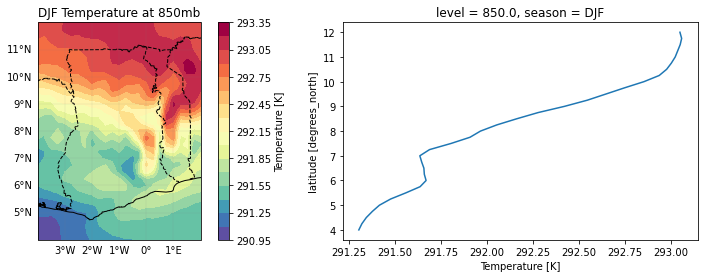

In [8]:
# we create the figure with `plt.figure` rather than `plt.subplots` and add each subplot one-by-one
fig = plt.figure(figsize=(14, 4))

# remember the notation for adding subplots (the first argument to .add_subplot) 
# is row-index, column-index and subplot number (i.e. 121 here)
ax = fig.add_subplot(121, projection=ccrs.PlateCarree())
ds_single_ghana.t.plot.contourf(ax=ax, cmap='Spectral_r', transform=ccrs.PlateCarree(), levels=20)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='gray')
gl.top_labels = False
gl.right_labels = False
ax.set_title('DJF Temperature at 850mb')## To set title

# adding the second subplot, so 122 here
ax = fig.add_subplot(122)
ds_single_ghana.mean(dim="longitude", keep_attrs=True).t.plot(ax=ax, y="latitude")

<b>Exercise 3</b>:

1. Compute and plot (in cartopy) the difference in relative humidity at the 925mb and 600mb level on (a) 1990-06-01 and (b) 2020-06-01 respectively. 

2. For any region of your choice, subset and produce plots from Question 1

3. For all questions from xarray part 2, plot all results with cartopy:

    a. Compute the seasonal climatology and plot for all four (4) seasons. 

    b. Compute and plot the seasonal anomaly for relative humidity at 600mb and on 1995-06-01

    c. Compute and plot the annual climatology of relative humidity at 600mb, averaged across years.

    d. Compute and plot the annual anomaly for relative humidity at 600mb and on 1995-06-01

    e. Downsample the relative humidity profile from daily to annual frequency.

    f. Upsample the annual rh obtained in Q5 to the monthly frequency.